# Prediciendo el desempeño escolar - El caso de dos escuelas en Portugal

### Ricardo Bautista Huerta

In [1]:
# Librerías
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats
#Sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from pyod.models.abod import ABOD
import pingouin as pg

In [2]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

## Fase 1: Entendiendo el Problema

<div style="text-align: justify"> Un problema que siempre ha persisitido en cualquier centro educativo es la manera de encontrar los verdaderos determinantes de los resultados de los estudiantes. Si bien, la literatura es amplia respecto al tema, no siempre se deben tomar en cuenta una ley a priori para usar los mismos determinantes en cada lugar u centro educativo, debido a que las condiciones de los alumnos, por distintas razones, pueden variar.

Es preciso recalcar que el conocer los determinantes de los resultados de los alumnos no solo puede ser de utilidad para el mismo centro educativo (en el que al tenerse claros, se puedan implementar mejoras internas o llevar a cabo acciones para mejorar el rendimiento), sino a un nivel estatal: los hacedores de políticas podrían redirigir sus acciones y medidas para afectar a las variables que tengan un mayor (y significativo) impacto sobre el rendimiento.

Así, en el presente trabajo, se cuenta con datos de dos escuelas de Portugal que comprenden: calificaciones de los estudiantes, características demográficas, sociales y relacionadas con la escuela y se recopiló mediante el uso de informes y cuestionarios escolares.

Cabe resaltar que la variable target es la nota final (G3) del estudiante. Al poder predecir esta variable podremos saber que características juegan un rol importante en el desempeño final del estudiante. </div>

## Fase 2: Preprocesamiento

#### Cargando los datos

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("student-mat.csv")
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

#### Variables

In [4]:
#Dimenson del dataframe
data.shape

(395, 33)

Se tiene un dataset con 395 estudiantes y 33 atributos o variables. Entre las principales tenemos:
1. La escuela del estudiante
2. El sexo del estudiante
3. La edad del estudiante
4. Residencia del estudiante (urbano o rural)
5. Tamaño de la familia (Menos a 3 personas o más de 3 personas)
6. Convivencia de los padres (Separados o Juntos)
7. Eduación de la madre (Ninguno, primaria, secundaria y superior)
8. Eduación del padre (Ninguno, primaria, secundaria y superior)
9. Motivo de elección de la escuela
10. Tutor del estudiante
11. Tiempo de estudios
12. Número de veces de fallo escolar
12. Clases pagadas adicionales
13. Apoyo educativo familiar
14. Actvidades extracurriculares
15. Internet en casa
16. En una relación romántica
17. Tiempo libre tras escuela
18. Consumo de alcohol en días de semana
19. Consumo de alcohol en fines de semana
20. Estado de salud
21. Ausencias escolares
22. Nota del primer periodo (G1)
23. Nota del segundo periodo (G2)

La variable target:
G3 - Nota final

In [5]:
#Valores Nulos
#No existen valores perdidos en el dataframe
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

El presente dataset no cuenta con variables missing o vacíos. Por lo que no habría necesidad de trabajar con un método para resolver el problema de data faltante.

In [6]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
#Comprobamos cuántas variables categóricas hay
categorical_data = data.select_dtypes(exclude=[np.number])
print ("Hay {} columnas categóricas en el dataset".format(categorical_data.shape[1]))

Hay 17 columnas categóricas en el dataset


In [8]:
#Variables Categóricas
categorical_data.any()

school        True
sex           True
address       True
famsize       True
Pstatus       True
Mjob          True
Fjob          True
reason        True
guardian      True
schoolsup     True
famsup        True
paid          True
activities    True
nursery       True
higher        True
internet      True
romantic      True
dtype: bool

In [9]:
#Variables Numéricas
numerical_data = data.select_dtypes(include=[np.number])
print ("Hay {} columnas numéricas en el dataset".format(numerical_data.shape[1]))

Hay 16 columnas numéricas en el dataset


In [10]:
#Variables Numéricas
numerical_data.any()

age           True
Medu          True
Fedu          True
traveltime    True
studytime     True
failures      True
famrel        True
freetime      True
goout         True
Dalc          True
Walc          True
health        True
absences      True
G1            True
G2            True
G3            True
dtype: bool

#### Outliers y tratamiento

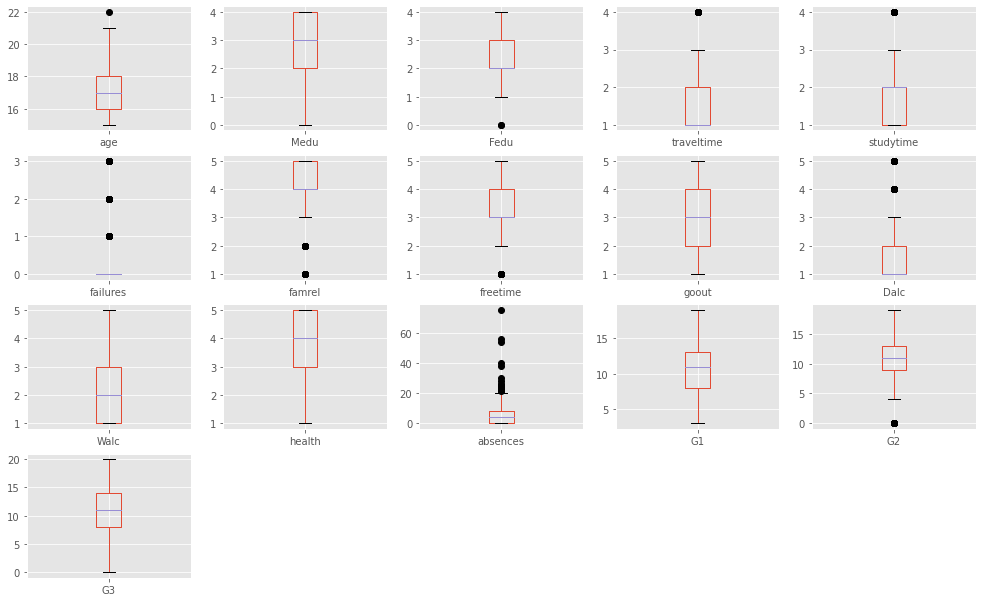

In [11]:
fig = plt.figure(figsize = (17,16))
ax = fig.gca()
data.rename(columns=lambda x: str(x)).plot(ax=ax, kind= 'box', subplots=True, layout=(6,5), sym='black')
plt.show()

Respecto al gráfico de cajas, es interesante notar que las variables que presentan mayores outliers dispersos son las del número de faltas y de fallas académicas. Asimismo, hay presencia de outliers en los años de eduación del padre, el tiempo de viaje a la escuela, el tiempo de estudio, el número de relaciones familiares, el tiempo libre y el nivel de consumo de alcohol en días de trabajo.

Solo se corregirán las ausencias escolares por su cantidad y porque no son categóricas ni delimitadas o agrupadas por el dataset. Asimismo, se debe notar que solo hay outliers hacia arriba. Por lo que, se hará que los outliers se conviertan al máximo umbral hacia arriba.

In [12]:
q1 = np.percentile(data['absences'], 25)
q3 = np.percentile(data['absences'], 75)
IQR = q3-q1
max_threshold = q3+(1.5*IQR)
max_threshold

20.0

In [13]:
data.absences.loc[data.absences > max_threshold]

40     25
74     54
103    26
183    56
198    24
205    28
216    22
260    21
276    75
277    22
280    30
307    38
313    22
315    40
320    23
Name: absences, dtype: int64

In [14]:
data.absences.loc[data.absences > max_threshold]  = max_threshold
max(data['absences'])

20.0

In [15]:
data.sort_values(['absences'], ascending=False)['absences'].head(10)

260    20.0
118    20.0
315    20.0
313    20.0
311    20.0
307    20.0
183    20.0
304    20.0
40     20.0
198    20.0
Name: absences, dtype: float64

Por razones del algoritmo a utilizar (regresión) se eliminarán variables nominales que no se puedan recodificar a categóricas que tengan una escala con significado (por ejemplo, una dicotómica que cumpla la condición de 1 para sí y 0 para no).

In [16]:
data = data.drop(["Mjob","Fjob","reason","guardian"], axis = 1)
data

school sex  age address famsize Pstatus  Medu  Fedu  traveltime  \
0       GP   F   18       U     GT3       A     4     4           2   
1       GP   F   17       U     GT3       T     1     1           1   
2       GP   F   15       U     LE3       T     1     1           1   
3       GP   F   15       U     GT3       T     4     2           1   
4       GP   F   16       U     GT3       T     3     3           1   
..     ...  ..  ...     ...     ...     ...   ...   ...         ...   
390     MS   M   20       U     LE3       A     2     2           1   
391     MS   M   17       U     LE3       T     3     1           2   
392     MS   M   21       R     GT3       T     1     1           1   
393     MS   M   18       R     LE3       T     3     2           3   
394     MS   M   19       U     LE3       T     1     1           1   

     studytime  failures schoolsup famsup paid activities nursery higher  \
0            2         0       yes     no   no         no     yes    yes   
1            2         0        no    yes   no         no      no    yes   
2            2         3       yes     no  yes         no     yes    yes   
3            3         0        no    yes  yes        yes     yes    yes   
4            2         0        no    yes  yes         no     yes    yes   
..         ...       ...       ...    ...  ...        ...     ...    ...   
390          2         2        no    yes  yes         no     yes    yes   
391          1         0        no     no   no         no      no    yes   
392          1         3        no     no   no         no      no    yes   
393          1         0        no     no   no         no      no    yes   
394          1         0        no     no   no         no     yes    yes   

    internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         no       no       4         3      4     1     1       3       6.0   
1        yes       no       5         3      3     1     1       3       4.0   
2        yes       no       4         3      2     2     3       3      10.0   
3        yes      yes       3         2      2     1     1       5       2.0   
4         no       no       4         3      2     1     2       5       4.0   
..       ...      ...     ...       ...    ...   ...   ...     ...       ...   
390       no       no       5         5      4     4     5       4      11.0   
391      yes       no       2         4      5     3     4       2       3.0   
392       no       no       5         5      3     3     3       3       3.0   
393      yes       no       4         4      1     3     4       5       0.0   
394      yes       no       3         2      3     3     3       5       5.0   

     G1  G2  G3  
0     5   6   6  
1     5   5   6  
2     7   8  10  
3    15  14  15  
4     6  10  10  
..   ..  ..  ..  
390   9   9   9  
391  14  16  16  
392  10   8   7  
393  11  12  10  
394   8   9   9  

[395 rows x 29 columns]

Ahora, se recodificaran a categóricas dicotómicas o binarias con su debida interpretación

In [17]:
cat_var = ["school","sex","address","famsize","schoolsup","Pstatus","famsup","paid","activities","nursery","higher", "internet","romantic"]
for column in cat_var:
    df_le = LabelEncoder()
    data[column] = df_le.fit_transform(np.ravel(data[[column]]))
data

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0         0    0   18        1        0        0     4     4           2   
1         0    0   17        1        0        1     1     1           1   
2         0    0   15        1        1        1     1     1           1   
3         0    0   15        1        0        1     4     2           1   
4         0    0   16        1        0        1     3     3           1   
..      ...  ...  ...      ...      ...      ...   ...   ...         ...   
390       1    1   20        1        1        0     2     2           1   
391       1    1   17        1        1        1     3     1           2   
392       1    1   21        0        0        1     1     1           1   
393       1    1   18        0        1        1     3     2           3   
394       1    1   19        1        1        1     1     1           1   

     studytime  failures  schoolsup  famsup  paid  activities  nursery  \
0            2         0          1       0     0           0        1   
1            2         0          0       1     0           0        0   
2            2         3          1       0     1           0        1   
3            3         0          0       1     1           1        1   
4            2         0          0       1     1           0        1   
..         ...       ...        ...     ...   ...         ...      ...   
390          2         2          0       1     1           0        1   
391          1         0          0       0     0           0        0   
392          1         3          0       0     0           0        0   
393          1         0          0       0     0           0        0   
394          1         0          0       0     0           0        1   

     higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0         1         0         0       4         3      4     1     1       3   
1         1         1         0       5         3      3     1     1       3   
2         1         1         0       4         3      2     2     3       3   
3         1         1         1       3         2      2     1     1       5   
4         1         0         0       4         3      2     1     2       5   
..      ...       ...       ...     ...       ...    ...   ...   ...     ...   
390       1         0         0       5         5      4     4     5       4   
391       1         1         0       2         4      5     3     4       2   
392       1         0         0       5         5      3     3     3       3   
393       1         1         0       4         4      1     3     4       5   
394       1         1         0       3         2      3     3     3       5   

     absences  G1  G2  G3  
0         6.0   5   6   6  
1         4.0   5   5   6  
2        10.0   7   8  10  
3         2.0  15  14  15  
4         4.0   6  10  10  
..        ...  ..  ..  ..  
390      11.0   9   9   9  
391       3.0  14  16  16  
392       3.0  10   8   7  
393       0.0  11  12  10  
394       5.0   8   9   9  

[395 rows x 29 columns]

Las variables categóricas ahora se interpretan para cada estudiante como
1. Escuela del estudiante (school) - 0 si pertenece a Gabriel Pereira y 1 si es de Mousinho da Silveira
2. Sexo (sex) - 0 si es femenino y 1 si es masculino
3. Tipo de vivienda (address) - 0 si es rural y 1 si es urbano
4. Tamaño de familia (famsize) - 0 si la familia tiene más de 3 miembros y 1 si tiene menos de 3
5. Estado de convivencia de los padres (Pstatus) - 0 si estan juntos y 1 si estan separados
6. Ayuda extra a la escolar (schoolsup) -  0 no y 1 sí
7. Apoyo educacional familiar (famsup) -  0 no y 1 sí
8. Pagó para clases extras (Matemáticas o Portugués) (paid) - 0 no y 1 sí
9. Actividades Extracurriculares (activities) -  0 no y 1 sí
10. Fue a la enfermería de la escuela (nursery) - 0 no y 1 sí
11. Quiere llevar eduación superior (higher)  - 0 no y 1 sí
12. Tiene acceso a internet en casa (internet) - 0 no y 1 sí
13. Tiene una relación romántica (romantic) - 0 no y 1 sí

## Fase 3: Análisis Exploratorio de datos

In [18]:
data.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu  traveltime   studytime    failures   schoolsup  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     2.749367    2.521519    1.448101    2.035443    0.334177    0.129114   
std      1.094735    1.088201    0.697505    0.839240    0.743651    0.335751   
min      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
25%      2.000000    2.000000    1.000000    1.000000    0.000000    0.000000   
50%      3.000000    2.000000    1.000000    2.000000    0.000000    0.000000   
75%      4.000000    3.000000    2.000000    2.000000    0.000000    0.000000   
max      4.000000    4.000000    4.000000    4.000000    3.000000    1.000000   

           famsup        paid  activities     nursery      higher    internet  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.612658    0.458228    0.508861    0.794937    0.949367    0.832911   
std      0.487761    0.498884    0.500555    0.404260    0.219525    0.373528   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    1.000000    1.000000    1.000000   
50%      1.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         romantic      famrel    freetime       goout        Dalc        Walc  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.334177    3.944304    3.235443    3.108861    1.481013    2.291139   
std      0.472300    0.896659    0.998862    1.113278    0.890741    1.287897   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    3.000000    2.000000    1.000000    1.000000   
50%      0.000000    4.000000    3.000000    3.000000    1.000000    2.000000   
75%      1.000000    5.000000    4.000000    4.000000    2.000000    3.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

           health    absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  395.000000  
mean     3.554430    5.187342   10.908861   10.713924   10.415190  
std      1.390303    5.694448    3.319195    3.761505    4.581443  
min      1.000000    0.000000    3.000000    0.000000    0.000000  
25%      3.000000    0.000000    8.000000    9.000000    8.000000  
50%      4.000000    4.000000   11.000000   11.000000   11.000000  
75%      5.000000    8.000000   13.000000   13.000000   14.000000  
max      5.000000   20.000000   19.000000   19.000000   20.000000

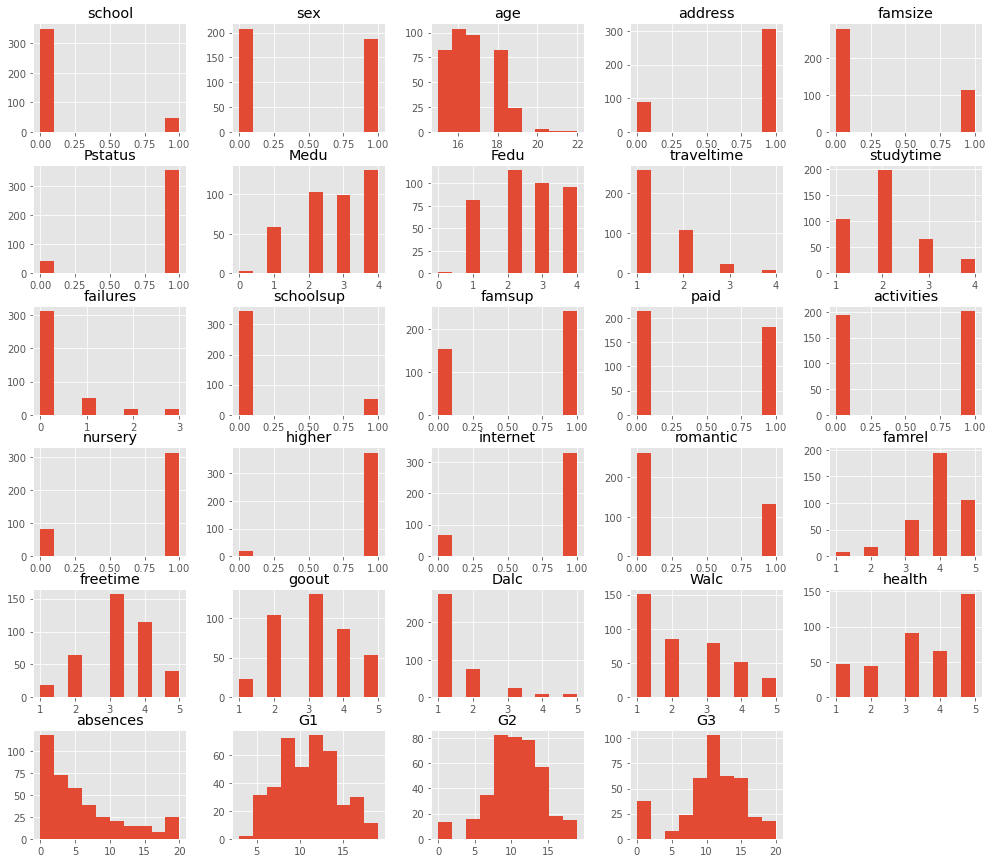

In [19]:
num_bins = 10
data.hist(bins = num_bins, figsize=(17,15))
plt.show()

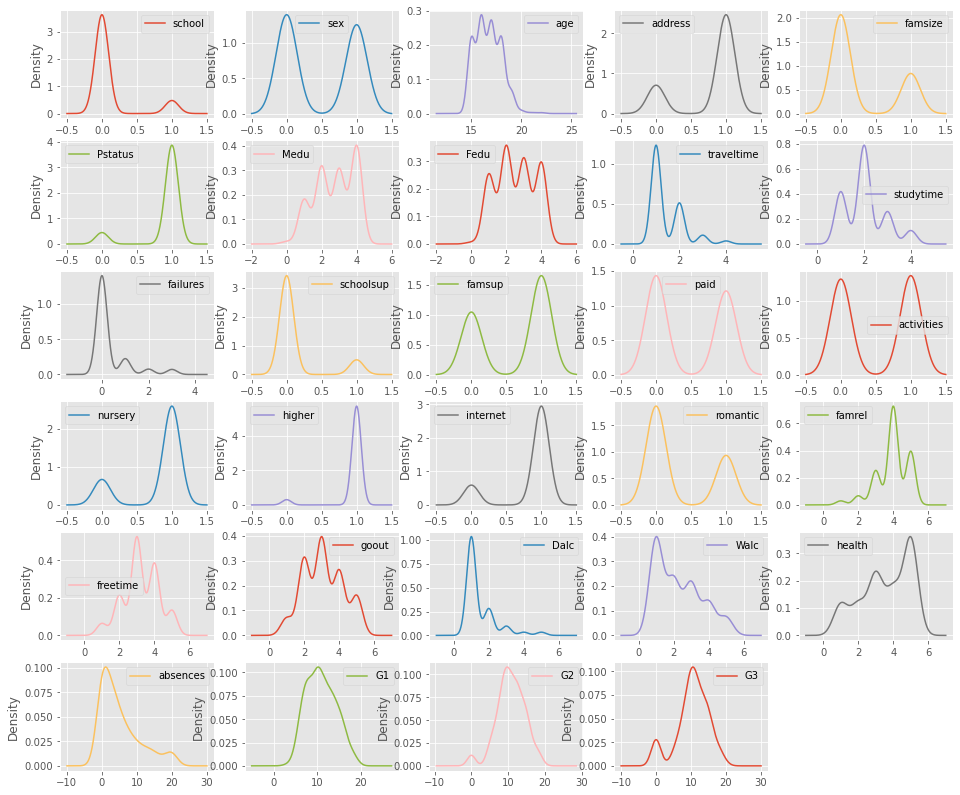

In [20]:
fig = plt.figure(figsize=(16,14))
ax = fig.gca()
data.plot(ax=ax, kind ='density', subplots = True, layout=[6,5], sharex=False)
plt.show()

Es interesante notar que las notas de los estudiantes en los tres periodos de tiempo, el tiempo libre, la frecuencia de salida con amigos y el nivel educativo del padre se aproximan a una distribución normal por su concentración en el medio de sus distribuciones.

Se aprecia una propensión a que los alumnos tengan cortos tiempos de viaje, que no tengan fallos escolares, una tendencia a beber poco en los días de semana y una nula o poca cantidad de asuencias escolares por la concentración de sus gráficos de barras y sus distribuciones asimétricas.

In [21]:
data.profile_report()

Del reporte podemos rescatar qué variables tienen una alta correlación entre ellas. Por ejemplo:
- Los años de educación de la madre con los años de eduación del padre
- El consumo de alcohol en los fines de semana y los días de semana
- Las notas en los tres tiempos
- La edad se encuentra correlacionada con las fallas escolares y la escuela
- Salir con amigos y consumir alcohol los fines de semana

<AxesSubplot:>

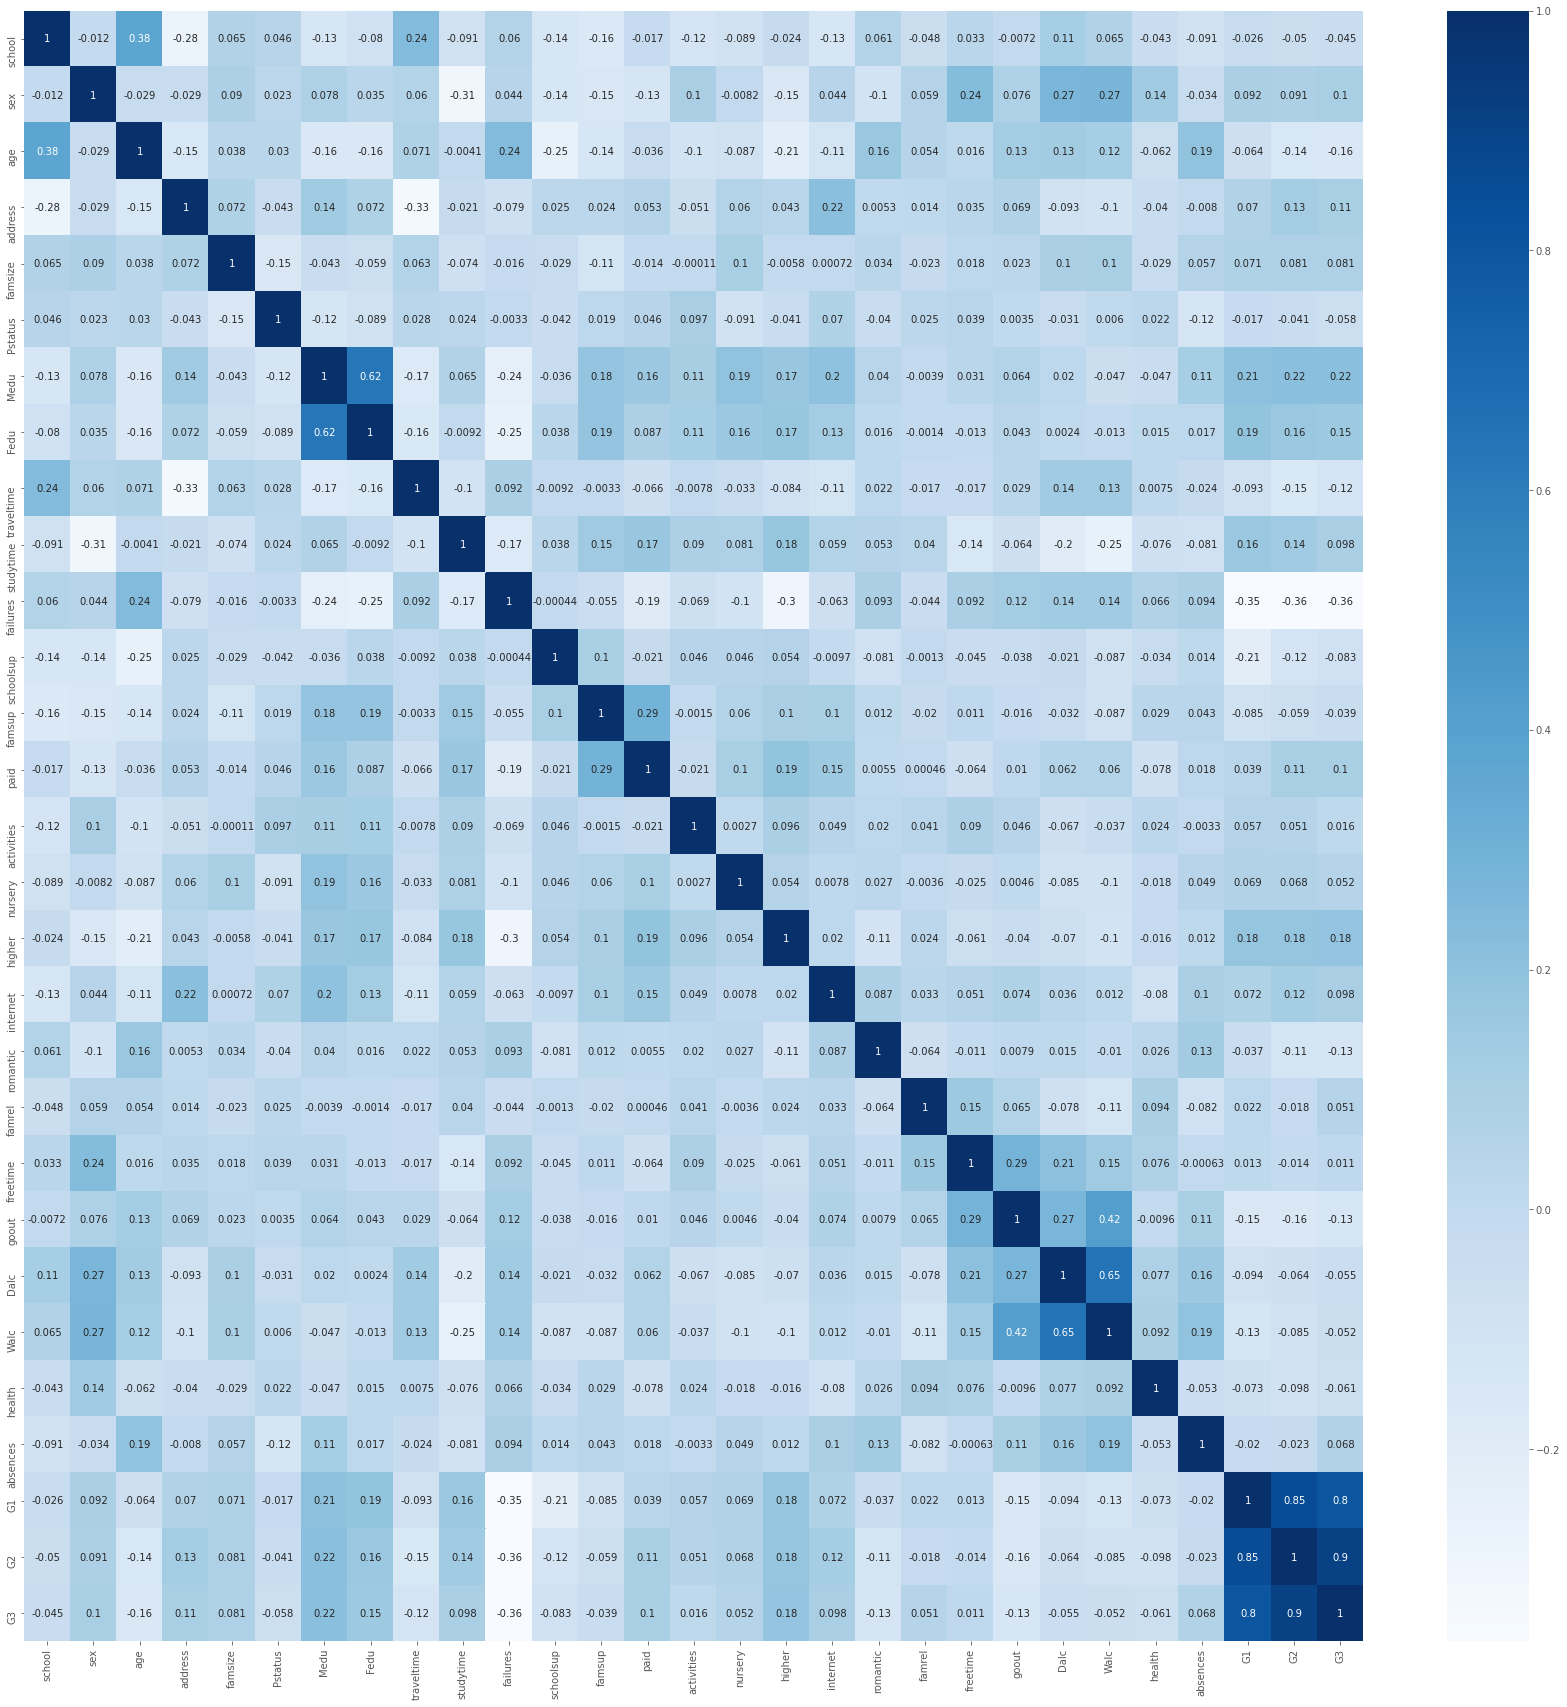

In [22]:
# Correlación Plot
plt.figure(figsize=(30,30))
sb.heatmap(data=data.corr(), annot=True,cmap="Blues")

En sí, las variables con las que entrenaremos el modelo no presentan valores extremos de correlación altos entre ellas: ninguna supera un umbral de 0.7.
Sin embargo, es necesario resaltar algunas correlaciones que se aproximan al valor como es el caso de la educación de los padres (medida en Fedu y Medu), se presenta una relación positiva que muestra que a mayor nivel educativo de la madre mayor sera el nivel educativo del padre.
Asimismo, se puede pareciar un valor relativamente elevado en el nivel de consumo de alcohol en los días de semana (Dalc) y los fines de semana (Walc), que muestra que el alumno es más propenso a consumir alcohol en ambos periodos.

In [23]:
corr = data.corr()
## Top 10 valores correlacionados con la variable target
print (corr['G3'].sort_values(ascending=False)[:10], '\n')

G3          1.000000
G2          0.904868
G1          0.801468
Medu        0.217147
higher      0.182465
Fedu        0.152457
address     0.105756
sex         0.103456
paid        0.101996
internet    0.098483
Name: G3, dtype: float64 



Es esperable que las variables G2 y G1 tengan una alta correlación con la variable target al tratarse de un estado anterior de la nota final. Asimismo, resulta interesante que los años de educación de los padres se encuentren más correlacionados lo que nos podría dar una idea inicial de su importancia.

De igual manera, ninguna variable presenta una correlación alta o significativa para la variable objetivo, por lo que no habría problema de elección de características.

In [24]:
## Últimos 5 valores correlacionados con la variable target
print (corr['G3'].sort_values(ascending=False)[-10:])

Walc         -0.051939
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
schoolsup    -0.082788
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


Por la parte de las menores correlacioandas, es normal esperar que las fallas escolares esten relacionadas negativamente con la nota final, asimismo resulta interesante que la edad sea una de las mayores relacionadas negativamente.

Al tener las correlaciones eliminaremos algunas del dataframe para evitar problemas de multicolinearidad, mejorar las predicciones y los estimadores.

In [25]:
data.drop(['Medu','Walc','G1'], axis=1, inplace= True)

In [26]:
data

school  sex  age  address  famsize  Pstatus  Fedu  traveltime  studytime  \
0         0    0   18        1        0        0     4           2          2   
1         0    0   17        1        0        1     1           1          2   
2         0    0   15        1        1        1     1           1          2   
3         0    0   15        1        0        1     2           1          3   
4         0    0   16        1        0        1     3           1          2   
..      ...  ...  ...      ...      ...      ...   ...         ...        ...   
390       1    1   20        1        1        0     2           1          2   
391       1    1   17        1        1        1     1           2          1   
392       1    1   21        0        0        1     1           1          1   
393       1    1   18        0        1        1     2           3          1   
394       1    1   19        1        1        1     1           1          1   

     failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0           0          1       0     0           0        1       1         0   
1           0          0       1     0           0        0       1         1   
2           3          1       0     1           0        1       1         1   
3           0          0       1     1           1        1       1         1   
4           0          0       1     1           0        1       1         0   
..        ...        ...     ...   ...         ...      ...     ...       ...   
390         2          0       1     1           0        1       1         0   
391         0          0       0     0           0        0       1         1   
392         3          0       0     0           0        0       1         0   
393         0          0       0     0           0        0       1         1   
394         0          0       0     0           0        1       1         1   

     romantic  famrel  freetime  goout  Dalc  health  absences  G2  G3  
0           0       4         3      4     1       3       6.0   6   6  
1           0       5         3      3     1       3       4.0   5   6  
2           0       4         3      2     2       3      10.0   8  10  
3           1       3         2      2     1       5       2.0  14  15  
4           0       4         3      2     1       5       4.0  10  10  
..        ...     ...       ...    ...   ...     ...       ...  ..  ..  
390         0       5         5      4     4       4      11.0   9   9  
391         0       2         4      5     3       2       3.0  16  16  
392         0       5         5      3     3       3       3.0   8   7  
393         0       4         4      1     3       5       0.0  12  10  
394         0       3         2      3     3       5       5.0   9   9  

[395 rows x 26 columns]

#### Importancia de las variables

In [27]:
X = data.iloc[:,0:25]
Y = data.iloc[:,25]

In [28]:
test = SelectKBest(score_func=f_regression, k=17)
fit = test.fit(X,Y)

In [29]:
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)

In [30]:
feature_scores = pd.concat([data_columns, data_scores],axis=1)
feature_scores.columns = ['Variable','Score']
print(feature_scores.nlargest(26,'Score'))

      Variable        Score
24          G2  1775.707546
9     failures    58.671666
15      higher    13.534903
2          age    10.535470
6         Fedu     9.351913
20       goout     7.054389
17    romantic     6.752698
7   traveltime     5.467880
3      address     4.445164
1          sex     4.251814
12        paid     4.131451
16    internet     3.849029
8    studytime     3.796826
10   schoolsup     2.712167
4      famsize     2.621832
23    absences     1.827276
22      health     1.484023
5      Pstatus     1.326927
21        Dalc     1.177693
14     nursery     1.047871
18      famrel     1.039556
0       school     0.798042
11      famsup     0.603505
13  activities     0.101892
19    freetime     0.050253


In [31]:
Umbral = 10
skb = SelectKBest(score_func=chi2, k=Umbral)
sel_skb = skb.fit(X, Y)
sel_skb_index = sel_skb.get_support()
data_norm_skb = X.iloc[:, sel_skb_index]
print('p_values', sel_skb.pvalues_)
print(data_norm_skb.columns)

p_values [8.90079031e-01 8.77466915e-01 9.99990805e-01 9.93980135e-01
 7.73448893e-01 9.99998961e-01 8.87127131e-01 9.86469683e-01
 9.91489433e-01 1.43606828e-21 4.13458713e-02 9.96775132e-01
 5.14645536e-01 9.74350267e-01 9.99863897e-01 9.99999920e-01
 9.99930641e-01 2.69675820e-01 9.99994819e-01 9.98901989e-01
 8.82637311e-01 4.48765538e-01 8.96038607e-01 2.68135806e-93
 2.75198829e-85]
Index(['sex', 'famsize', 'failures', 'schoolsup', 'paid', 'romantic', 'goout',
       'Dalc', 'absences', 'G2'],
      dtype='object')


El uso de SelectKBest nos permite ver en términos de regresión y de chi2 las variables más relevantes. En este caso, se usará la función de chi2 con el umbral de 10 (equivalente a un p-value de 0.1 de significancia) para elegir las variables más importantes.
En este caso fueron:

'sex', 'famsize', 'failures', 'schoolsup', 'paid', 'romantic', 'goout', 'Dalc', 'absences' y 'G2'

Notar que este proceso es estocástico, por lo que tras haber corrido el códgio más de una vez fueron las que más, en promedio, se repitieron.

## Fase 5: Modelado

#### Linea Base (sin dropear variables)

Dividiendo test y train

In [32]:
array = data.values
X = data.iloc[:,0:25]
Y = data.iloc[:,25]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                               test_size=0.2, random_state=20) 

In [33]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []
models.append(('LiR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('k-NN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [34]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

LiR: -4.361 (2.085)
LASSO: -4.116 (2.262)
EN: -4.094 (2.239)
k-NN: -3.399 (1.445)
CART: -5.403 (3.019)
SVM: -4.454 (2.370)


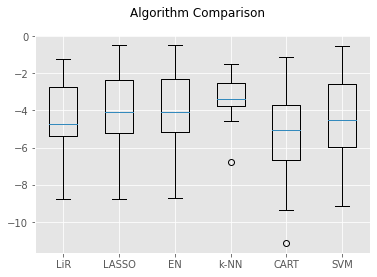

In [35]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Según las métricas los mejores algoritmos serían los de KNeighborsRegressor, ElasticNet, Lasso, Support Vector Machine y Regersión Lineal (en ese orden).

Por propósitos del proyecto se enfatizará en el de Regresión Lineal.

In [36]:
model = LinearRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
predicted

array([ 6.75484455,  7.37805926,  7.31970306, 10.67958362, 10.06908819,
        9.28972984, 14.18432525, 15.01088689, 10.48306779,  7.03038017,
       -1.13192144, 10.41492258, 13.20971835,  6.1192844 , 18.71998745,
       18.18529485, 15.2182068 , 15.53243004,  9.23224727, 15.48429231,
       12.5770626 , 15.4217395 , 10.6193137 ,  7.57083444,  4.32064677,
        7.52188133, 18.75559993, 11.32212115, 12.18752502, 14.96932784,
        9.12429006, 14.53503265,  9.40253211, 14.38531855,  3.2376035 ,
       17.76309248,  7.97518203, 11.20586481, 13.99067902,  8.2116007 ,
       10.31342708,  6.3772829 , 10.14878557, 20.69956191, 14.06815575,
        2.06638819,  8.05542111,  8.43229601, 18.01271818, 16.44476642,
        8.05713518,  9.63568216, 11.33079859, 10.88889341, 10.69932664,
        4.97838605,  9.4790884 ,  9.04427719,  5.05180886, 12.34701952,
       13.87221689,  9.25778906, 10.03154228, 17.15911242, 15.2727107 ,
       11.33372881,  9.09608929,  9.81473177, 11.98840954, 11.14

In [37]:
MAE = mean_absolute_error(Y_test, predicted)
MAE

1.0654240615067478

In [38]:
MSE = mean_squared_error(Y_test, predicted)
MSE

2.300586866650162

In [39]:
R2 = r2_score(Y_test, predicted)
R2

0.8811485966362295

# Fase 6: Forecasting

In [40]:
model.fit(X_train, Y_train)

LinearRegression()

In [41]:
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))

2.300586866650162


In [42]:
print(predictions)

[ 6.75484455  7.37805926  7.31970306 10.67958362 10.06908819  9.28972984
 14.18432525 15.01088689 10.48306779  7.03038017 -1.13192144 10.41492258
 13.20971835  6.1192844  18.71998745 18.18529485 15.2182068  15.53243004
  9.23224727 15.48429231 12.5770626  15.4217395  10.6193137   7.57083444
  4.32064677  7.52188133 18.75559993 11.32212115 12.18752502 14.96932784
  9.12429006 14.53503265  9.40253211 14.38531855  3.2376035  17.76309248
  7.97518203 11.20586481 13.99067902  8.2116007  10.31342708  6.3772829
 10.14878557 20.69956191 14.06815575  2.06638819  8.05542111  8.43229601
 18.01271818 16.44476642  8.05713518  9.63568216 11.33079859 10.88889341
 10.69932664  4.97838605  9.4790884   9.04427719  5.05180886 12.34701952
 13.87221689  9.25778906 10.03154228 17.15911242 15.2727107  11.33372881
  9.09608929  9.81473177 11.98840954 11.14042976  8.08081413 13.88426611
 13.0146339   8.17456496 14.08541747  4.70636009  4.83864179 12.00336379
 11.47787178]


In [43]:
predictions.mean()

10.88158598812532

In [44]:
data.G3.mean()

10.415189873417722

In [45]:
y_pred = model.predict(X_test)
print('R^2:',metrics.r2_score(Y_test, y_pred))

R^2: 0.8811485966362295


Un R cuadrado de 0.8811 nos indica un buen ajuste del modelo. No obstante, esto sucede porque el modelo se encuentra con un problema de overfitting o sobre ajuste.
Se deben eliminar variables consideradas con los criterios anteriores en la importancia de las variables.

### Coeficientes

In [46]:
pg.linear_regression(X_train, Y_train)

names      coef        se          T          pval        r2  \
0    Intercept  1.500515  2.254416   0.665589  5.062026e-01  0.831724   
1       school  0.416073  0.442145   0.941034  3.474708e-01  0.831724   
2          sex  0.230020  0.267021   0.861430  3.897132e-01  0.831724   
3          age -0.236606  0.110431  -2.142564  3.298055e-02  0.831724   
4      address -0.063216  0.310168  -0.203813  8.386424e-01  0.831724   
5      famsize  0.043855  0.258126   0.169897  8.652096e-01  0.831724   
6      Pstatus -0.265066  0.384841  -0.688767  4.915205e-01  0.831724   
7         Fedu -0.025935  0.116281  -0.223040  8.236612e-01  0.831724   
8   traveltime  0.026163  0.181064   0.144495  8.852098e-01  0.831724   
9    studytime -0.101241  0.150196  -0.674058  5.008112e-01  0.831724   
10    failures -0.352126  0.167581  -2.101225  3.648406e-02  0.831724   
11   schoolsup -0.004633  0.358854  -0.012911  9.897078e-01  0.831724   
12      famsup  0.091991  0.254101   0.362024  7.175980e-01  0.831724   
13        paid  0.026793  0.249678   0.107310  9.146172e-01  0.831724   
14  activities -0.349650  0.235747  -1.483158  1.391182e-01  0.831724   
15     nursery -0.386439  0.293736  -1.315603  1.893466e-01  0.831724   
16      higher -0.330432  0.555608  -0.594721  5.524936e-01  0.831724   
17    internet -0.276274  0.314341  -0.878898  3.801841e-01  0.831724   
18    romantic -0.073774  0.251062  -0.293846  7.690859e-01  0.831724   
19      famrel  0.392299  0.125993   3.113653  2.032531e-03  0.831724   
20    freetime  0.098908  0.127840   0.773682  4.397489e-01  0.831724   
21       goout  0.028386  0.110863   0.256043  7.980991e-01  0.831724   
22        Dalc -0.167825  0.145258  -1.155362  2.488931e-01  0.831724   
23      health  0.112128  0.084502   1.326930  1.855756e-01  0.831724   
24    absences  0.107298  0.021433   5.006129  9.653941e-07  0.831724   
25          G2  1.083865  0.034063  31.819455  1.350981e-96  0.831724   

      adj_r2  CI[2.5%]  CI[97.5%]  
0   0.817217 -2.936576   5.937606  
1   0.817217 -0.454147   1.286294  
2   0.817217 -0.295526   0.755566  
3   0.817217 -0.453954  -0.019258  
4   0.817217 -0.673681   0.547249  
5   0.817217 -0.464182   0.551892  
6   0.817217 -1.022500   0.492369  
7   0.817217 -0.254797   0.202927  
8   0.817217 -0.330203   0.382529  
9   0.817217 -0.396854   0.194372  
10  0.817217 -0.681956  -0.022296  
11  0.817217 -0.710922   0.701656  
12  0.817217 -0.408126   0.592107  
13  0.817217 -0.464618   0.518204  
14  0.817217 -0.813642   0.114342  
15  0.817217 -0.964563   0.191685  
16  0.817217 -1.423967   0.763104  
17  0.817217 -0.894953   0.342405  
18  0.817217 -0.567908   0.420361  
19  0.817217  0.144322   0.640276  
20  0.817217 -0.152704   0.350519  
21  0.817217 -0.189812   0.246584  
22  0.817217 -0.453718   0.118068  
23  0.817217 -0.054187   0.278442  
24  0.817217  0.065114   0.149483  
25  0.817217  1.016823   1.150907